In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
path = 'E:\\IMAGE CLASSIFICATION PROJECTS_KAGGLE\\Dog vs cat classification\\train\\train'

In [3]:
filenames = []
import os
for img in os.listdir(path):
    filenames.append(img)

In [4]:
cats= list(filter(lambda x:'cat' in x,filenames))

In [5]:
dogs = list(filter(lambda x:'dog' in x, filenames))

In [6]:
import random
random.shuffle(cats)
random.shuffle(dogs)

In [7]:
cat_train = cats[0 : int(len(cats)*0.8)]
cat_val = cats[int(len(cats)*0.8):len(cats)]

dog_train = dogs[0:int(len(dogs)*0.8)]
dog_val = dogs[int(len(dogs)*0.8):len(dogs)]

In [8]:
TRAINING_SET = os.path.join(path,'TRAINING_SET')
TESTING_SET = os.path.join(path,'TESTING_SET')

if not os.path.exists(TRAINING_SET):
    os.makedirs(TRAINING_SET)
    
if not os.path.exists(TESTING_SET):
    os.makedirs(TESTING_SET)

In [10]:
#CREATING SUB FOLDERS FOR CATS AND DOGS

CAT_TRAIN= os.path.join(TRAINING_SET,'cats_train')
DOG_TRAIN = os.path.join(TRAINING_SET,'dogs_train')
CAT_VAL = os.path.join(TESTING_SET,'cats_val')
DOG_VAL = os.path.join(TESTING_SET, 'dogs_val')

if not os.path.exists(CAT_TRAIN):
    os.makedirs(CAT_TRAIN)

if not os.path.exists(DOG_TRAIN):
    os.makedirs(DOG_TRAIN)

if not os.path.exists(CAT_VAL):
    os.makedirs(CAT_VAL)

if not os.path.exists(DOG_VAL):
    os.makedirs(DOG_VAL)

In [12]:
#Moving corresponding images to cats and dogs subfolder
for i in cat_train:
    source = os.path.join(path,i)
    destination= os.path.join(CAT_TRAIN,i)
    os.rename(source,destination)
    
for i in cat_val:
    source = os.path.join(path,i)
    destination= os.path.join(CAT_VAL,i)
    os.rename(source,destination)

    
for i in dog_train:
    source = os.path.join(path,i)
    destination= os.path.join(DOG_TRAIN,i)
    os.rename(source,destination)
    
for i in dog_val:
    source = os.path.join(path,i)
    destination= os.path.join(DOG_VAL,i)
    os.rename(source,destination)

In [13]:
print("Total cat images in training set",len(os.listdir(CAT_TRAIN)))
print("Total cat images in validation set", len(os.listdir(CAT_VAL)))
print("Total dog images in training set",len(os.listdir(DOG_TRAIN)))
print("Total dog images in validation set",len(os.listdir(DOG_VAL)))

Total cat images in training set 10000
Total cat images in validation set 2500
Total dog images in training set 10000
Total dog images in validation set 2500


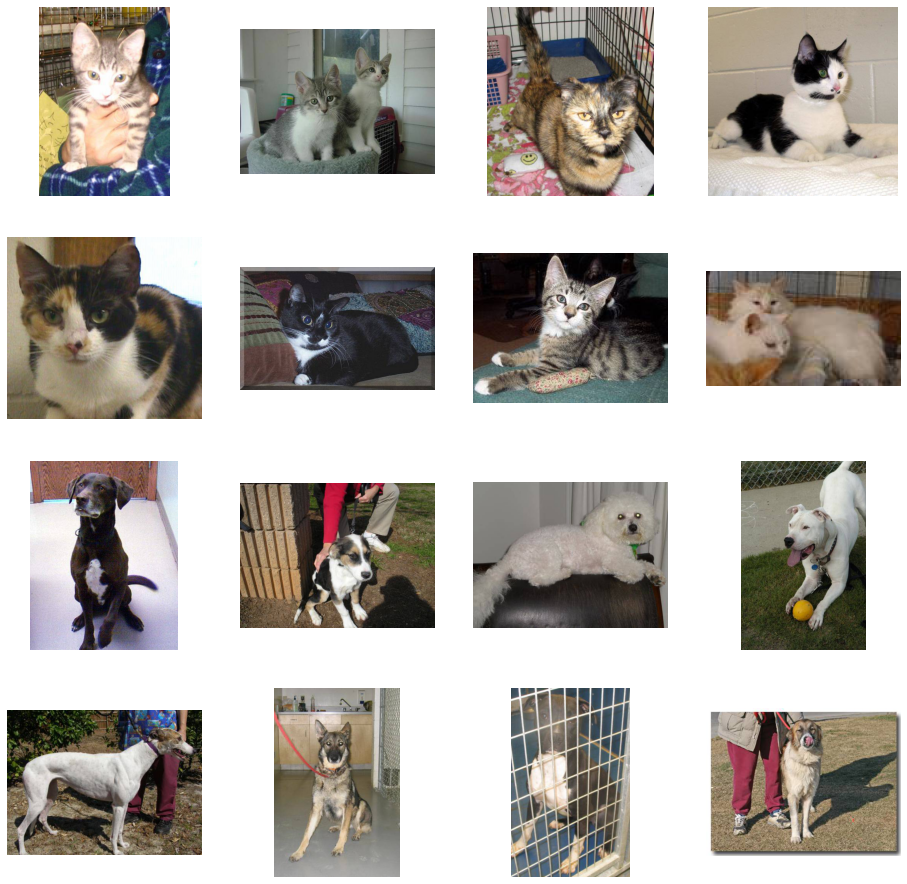

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(CAT_TRAIN, fname) 
                for fname in cat_train[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(DOG_TRAIN, fname) 
                for fname in dog_train[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [29]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [37]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['binary_accuracy'])

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_SET,  
        target_size=(300, 300),  
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        TESTING_SET,  
        target_size=(300, 300),  
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [39]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 46s 6s/step - loss: 0.5862 - binary_accuracy: 0.7021 - val_loss: 0.5832 - val_binary_accuracy: 0.7188
Epoch 2/15
8/8 [==============================] - 41s 5s/step - loss: 0.5737 - binary_accuracy: 0.7090 - val_loss: 0.5818 - val_binary_accuracy: 0.7109
Epoch 3/15
8/8 [==============================] - 40s 5s/step - loss: 0.5714 - binary_accuracy: 0.7168 - val_loss: 0.5855 - val_binary_accuracy: 0.6797
Epoch 4/15
8/8 [==============================] - 42s 5s/step - loss: 0.5699 - binary_accuracy: 0.7129 - val_loss: 0.5809 - val_binary_accuracy: 0.7109
Epoch 5/15
8/8 [==============================] - 39s 5s/step - loss: 0.5785 - binary_accuracy: 0.6943 - val_loss: 0.5777 - val_binary_accuracy: 0.7266
Epoch 6/15
8/8 [==============================] - 42s 5s/step - loss: 0.5776 - binary_accuracy: 0.7266 - val_loss: 0.5780 - val_binary_accuracy: 0.7188
Epoch 7/15
8/8 [==============================] - 39s 5s/step - loss: 0.5710 - binary_ac